In [18]:
import folium 
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('C:/Users/mikhe/OneDrive/Desktop/job_shop/cmake-build-debug/output.csv')
df1 = pd.read_csv('C:/Users/mikhe/OneDrive/Desktop/job_shop/cmake-build-debug/special_values.csv')

In [2]:
df.head()

,ego_lat,ego_lng,a1_lat,a1_lng,a2_lat,a2_lng,f_c,f_1,f_2,dist_to_dest,dist_to_c,dist_to_a1,dist_to_a2
0,44.0768,-103.215,44.2627,-105.523,43.6651,-116.739,0.0,18461400.0,0.0,1083.87,430.354,185.207,1083.87
1,44.0767,-103.215,44.2627,-105.522,43.6651,-116.739,0.0,18461200.0,0.0,1083.89,430.367,185.208,1083.89
2,44.0767,-103.214,44.2629,-105.522,43.6651,-116.739,0.0,18460400.0,0.0,1083.90,430.378,185.212,1083.90
3,44.0767,-103.214,44.2630,-105.522,43.6652,-116.739,0.0,18458500.0,0.0,1083.90,430.377,185.222,1083.90
4,44.0769,-103.214,44.2632,-105.522,43.6652,-116.739,0.0,18457800.0,0.0,1083.91,430.395,185.225,1083.91


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111675 entries, 0 to 111674
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ego_lat       111675 non-null  float64
 1   ego_lng       111675 non-null  float64
 2   a1_lat        111675 non-null  float64
 3   a1_lng        111675 non-null  float64
 4   a2_lat        111675 non-null  float64
 5   a2_lng        111675 non-null  float64
 6   f_c           111675 non-null  float64
 7   f_1           111675 non-null  float64
 8   f_2           111675 non-null  float64
 9   dist_to_dest  111675 non-null  float64
 10  dist_to_c     111675 non-null  float64
 11  dist_to_a1    111675 non-null  float64
 12  dist_to_a2    111675 non-null  float64
dtypes: float64(13)
memory usage: 11.1 MB


In [4]:
df['f_c'].describe()

count    1.116750e+05
mean     3.298949e+11
std      1.584980e+12
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.285675e+10
max      1.732250e+13
Name: f_c, dtype: float64

In [5]:
df['f_1'].describe()

count    1.116750e+05
mean     6.338633e+06
std      8.655792e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.043220e+07
max      4.114720e+07
Name: f_1, dtype: float64

In [6]:
df['f_2'].describe()

count    1.116750e+05
mean     1.754352e+07
std      4.926903e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.156390e+08
Name: f_2, dtype: float64

In [7]:
# We saved values of functions every second, so, value of entries directly represents number of seconds.
# We can use this value to represent time
df['time_hours'] = df.index / 3600  

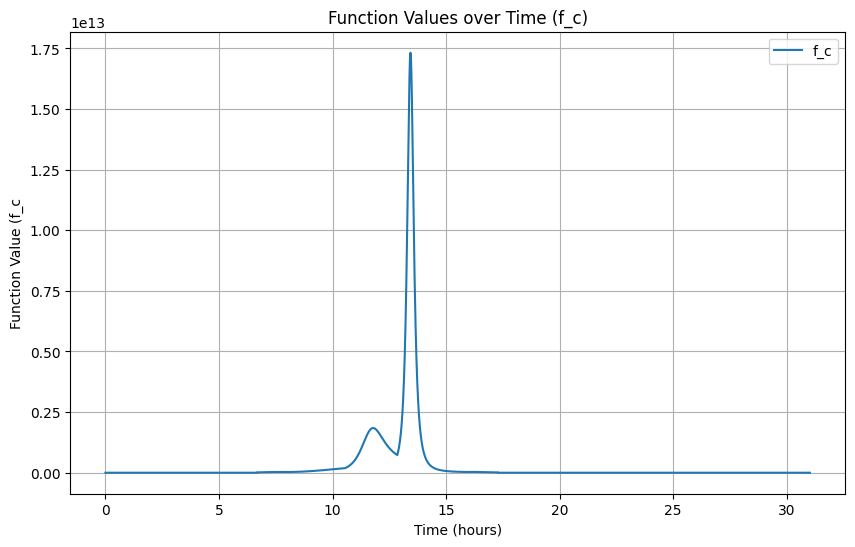

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df['time_hours'], df['f_c'], label='f_c')  


plt.xlabel('Time (hours)') 
plt.ylabel('Function Value (f_c') 
plt.title('Function Values over Time (f_c)') 
plt.legend()
plt.grid(True) 
plt.show()

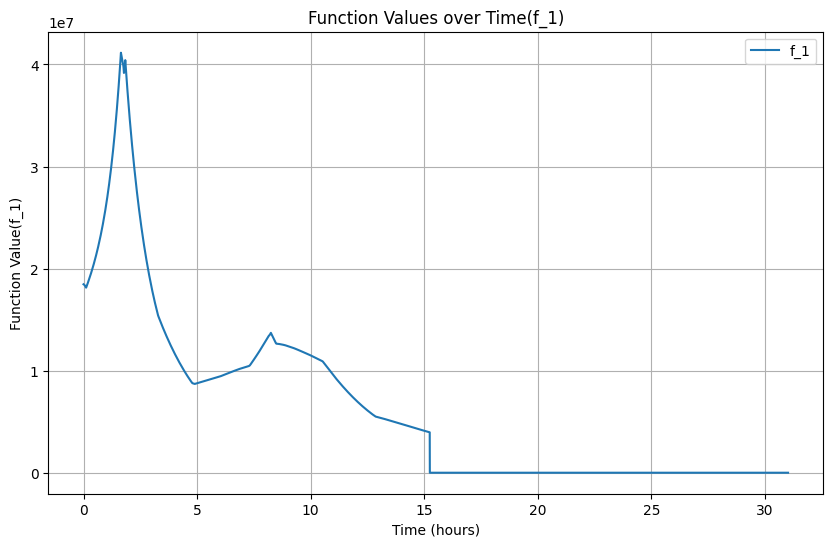

In [9]:
plt.figure(figsize=(10, 6))
 
plt.plot(df['time_hours'], df['f_1'], label='f_1') 


plt.xlabel('Time (hours)') 
plt.ylabel('Function Value(f_1)') 
plt.title('Function Values over Time(f_1)') 
plt.legend()
plt.grid(True) 
plt.show()

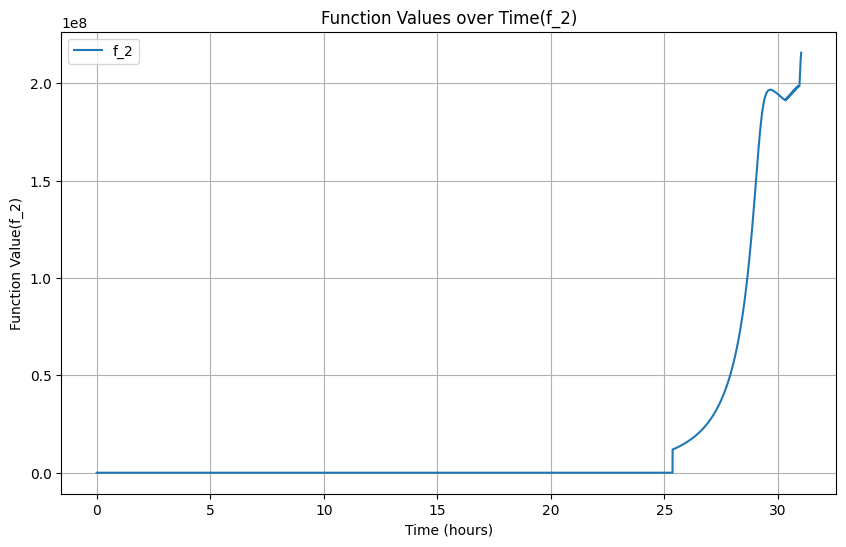

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['time_hours'], df['f_2'], label='f_2') 

plt.xlabel('Time (hours)') 
plt.ylabel('Function Value(f_2)') 
plt.title('Function Values over Time(f_2)') 
plt.legend()
plt.grid(True) 
plt.show()

In [19]:
df1.head()

,ego_lat,ego_lng,f_c,f_1,f_2,dist_to_dest,dist_to_c,dist_to_a1,dist_to_a2
0,42.8653,-105.695,1.261050e+10,9997050.0,0,898.014,199.935,251.683,915.316
1,42.8654,-105.696,1.262350e+10,9997750.0,0,897.942,199.867,251.674,915.248
2,42.8655,-105.697,1.263640e+10,9998450.0,0,897.870,199.798,251.666,915.180
3,42.8656,-105.697,1.264940e+10,9999150.0,0,897.798,199.730,251.657,915.113
4,42.8657,-105.698,1.266240e+10,9999850.0,0,897.727,199.662,251.648,915.045


In [11]:
# Define the center coordinates 
map_center = [df['ego_lat'].mean(), df['ego_lng'].mean()]

my_map = folium.Map(location=map_center, zoom_start=12)


In [22]:
# Ego trajectory
folium.PolyLine(
    list(zip(df['ego_lat'], df['ego_lng'])),
    color='blue', weight=2.5, opacity=1
).add_to(my_map)

# Superimposed, highlighted segments which satisfied the condition:
# Ego trajectory
folium.PolyLine(
    list(zip(df1['ego_lat'], df1['ego_lng'])),
    color='yellow', weight=2.5, opacity=1
).add_to(my_map)

# A1 and A2 trajectories
folium.PolyLine(
    list(zip(df['a1_lat'], df['a1_lng'])),
    color='green', weight=2.5, opacity=1
).add_to(my_map)
folium.PolyLine(
    list(zip(df['a2_lat'], df['a2_lng'])),
    color='red', weight=2.5, opacity=1
).add_to(my_map)


In [23]:
# Add car icon to ego
car_icon = folium.features.CustomIcon("C:/Users/mikhe/OneDrive/Desktop/download.png", icon_size=(25,25))

folium.Marker(location=[43.6651347, -116.73921890223438], popup="Ego", icon=car_icon).add_to(my_map)


In [24]:
# Final position of A1: 45.2521, -121.783
# Final position of A2: 43.7358, -117.905

# Add a Marker for circle 'C'
folium.Marker(
    location=[42.55029319411949, -108.10396510030051],
    popup='Area C',
    icon=folium.Icon(color='purple')
).add_to(my_map)

#Add a circle to represent the radius of Area C (adjust the radius value)
folium.Circle(
    location=[42.55029319411949, -108.10396510030051],
    radius = 200000, 
    color = 'purple',
    fill = False
).add_to(my_map)


In [25]:
# Add a Marker for circle 'A1'
folium.Marker(
    location=[45.2521, -121.783],
    popup='Area A1',
    icon=folium.Icon(color='black')
).add_to(my_map)

#Add a circle to represent the radius of Area C (adjust the radius value)
folium.Circle(
    location=[45.2521, -121.783],
    radius = 400000,  # In meters
    color = 'black',
    fill = False
).add_to(my_map)


In [26]:
# Add a Marker for circle 'A2'
folium.Marker(
    location=[43.7358, -117.905],
    popup='Area A2',
    icon=folium.Icon(color='orange')
).add_to(my_map)


#Add a circle to represent the radius of Area C (adjust the radius value)
folium.Circle(
    location=[43.7358, -117.905],
    radius = 400000, 
    color = 'orange', # In meters
    fill = False
).add_to(my_map)


In [27]:
my_map.save('my_map.html')